In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Метод наименьших квадратов. Линейная аппроксимация

Зададим зашумленный набор данных с изначально линейной зависимостью $y = kx + b$, а потом попытаемся восстановить коэффициенты этой зависимости.

In [2]:
N = 20
x = np.arange(N)
y = 3 * x - 10 + 5 * np.random.normal(size=N)

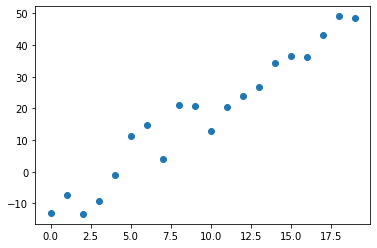

In [3]:
plt.scatter(x, y)

МНК для любых полиномов -- задача линейная, так как нам нужно найти коэффициенты при $x^n$, которые входят в полином линейно. То есть задачу можно представить в виде системы линейных уравнений. Сформируем матрицу $A$ для такой системы. У нас есть набор $N$ пар значений $\{x_i, y_i\}$ и два неизвестных коэффициента $k, b$, причем $y_i = x_i \cdot k + 1 \cdot b$. Тогда
$$
A = \left(\begin{array}{cc}
x_0 & 1 \\
x_1 & 1 \\
. & . \\
. & . \\
x_N & 1
\end{array}\right)
$$

In [4]:
A = np.vstack((x, np.ones_like(x))).T

Матрица $A$ неквадратная, и число строк больше числа столбцов, значит система переопределена. Такие системы решаются с помощью псевдообратной матрицы (а также другими способами) $A^+=(A^TA)^{-1}A^T$. В `numpy` есть модуль `linalg` для операций с матрицами, в котором есть функция псевдообращения `pinv`.

In [5]:
A_pinv_direct = np.linalg.inv(A.T.dot(A)).dot(A.T)
A_pinv_np = np.linalg.pinv(A)

Сравним результаты вычисления псевдообратной матрицы по явной формуле и по библиотечной:

In [6]:
np.allclose(A_pinv_direct, A_pinv_np)

True

Решение системы записывается рчевидным образом: 
$$
\left(
\begin{array}{c}
k \\
b
\end{array}
\right) = A^+y
$$

In [7]:
A_pinv_direct.dot(y)

array([  3.28006163, -13.16888875])

Также для решения задачи можно воспользоваться библиотечной функцией `np.linalg.lstsq`

In [8]:
k, b = np.linalg.lstsq(A, y)[0]

<ipython-input-8-da1271bb9971>:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  k, b = np.linalg.lstsq(A, y)[0]


Выведем результаты вычислений на график

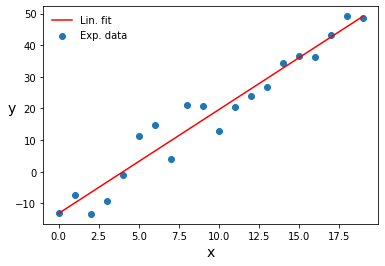

In [12]:
plt.scatter(x, y, label='Exp. data')
plt.plot(x, k * x + b, color='r', label='Lin. fit')
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14, rotation=0)
plt.legend(frameon=0)